In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\USER\Downloads\NCI60_X.csv")

In [3]:
data.shape

(64, 6831)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6831 entries, Unnamed: 0 to 6830
dtypes: float64(6830), object(1)
memory usage: 3.3+ MB


In [5]:
new_data=data.drop('Unnamed: 0',axis=1)

In [6]:
new_data.shape

(64, 6830)

In [7]:
missing_column=data.columns[data.isna().sum()/len(data.index)*100>90]

In [8]:
missing_column

Index([], dtype='object')

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [10]:
mergings=linkage(new_data,method='complete')

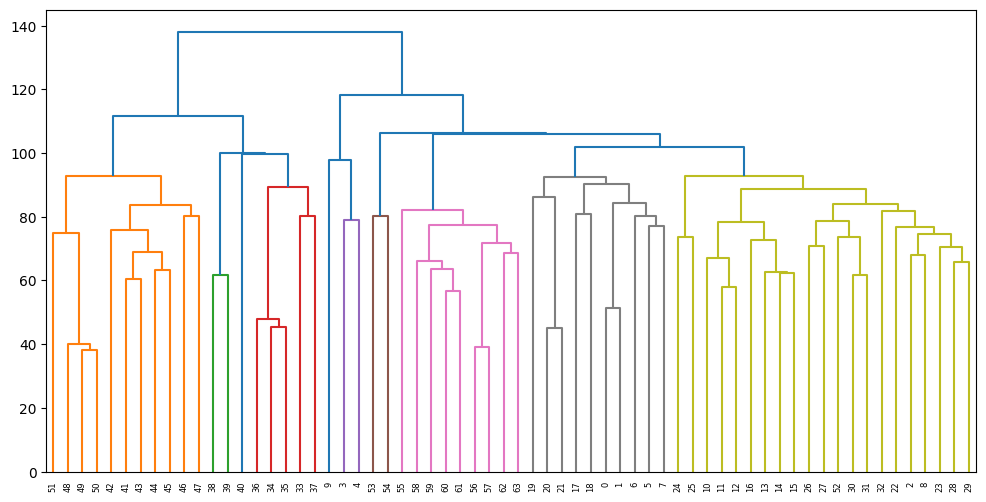

In [11]:
plt.figure(figsize=(12,6))
dendrogram(mergings)
plt.show()

In [12]:
labels = fcluster(mergings, 85, criterion='distance')

In [13]:
labels

array([14, 14, 17,  7,  7, 14, 14, 14, 17,  8, 16, 16, 16, 16, 16, 16, 16,
       13, 13, 12, 11, 11, 17, 17, 15, 15, 17, 17, 17, 17, 17, 17, 17,  5,
        4,  4,  4,  5,  3,  3,  6,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,
        1, 17,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)

In [14]:
new_data['hc_clusters']=labels

In [15]:
new_data

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,14
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,14
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,17
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,7
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,10
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,10
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,10
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,10


In [16]:
new_data['hc_clusters'].value_counts()

17    12
10     9
16     7
2      7
14     5
1      4
4      3
13     2
11     2
5      2
3      2
7      2
9      2
15     2
12     1
8      1
6      1
Name: hc_clusters, dtype: int64

# WITH PCA

In [17]:
data1=data

In [18]:
data1.shape

(64, 6831)

In [19]:
data2=data1.drop('Unnamed: 0',axis=1)

In [20]:
data2.shape

(64, 6830)

In [21]:
data2.corr()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
1,1.000000,0.369523,0.224803,0.072525,-0.111652,0.082434,0.102550,0.383263,0.146702,0.200520,...,-0.001301,-0.110626,-0.104605,-0.175310,-0.201395,-0.039783,-0.036840,-0.007935,-0.082233,-0.068994
2,0.369523,1.000000,0.365087,0.234746,0.156462,0.190006,0.347300,0.046215,0.259777,0.043624,...,-0.019406,-0.100822,-0.036153,0.002595,0.016097,-0.048616,0.007148,-0.083373,-0.042292,-0.046844
3,0.224803,0.365087,1.000000,0.234463,0.105175,0.025614,0.101811,0.008317,-0.044394,0.223556,...,0.054223,0.026336,0.078713,0.051154,0.075279,-0.125612,-0.035144,0.116060,0.095782,0.080308
4,0.072525,0.234746,0.234463,1.000000,0.139227,0.072153,0.050299,-0.117858,0.032301,-0.157428,...,-0.183226,-0.237242,-0.193870,-0.230741,-0.081435,-0.196066,0.007615,-0.050696,-0.042771,0.010048
5,-0.111652,0.156462,0.105175,0.139227,1.000000,0.252648,0.249501,-0.071547,-0.044091,-0.150494,...,-0.157010,-0.202877,-0.146788,-0.080164,-0.119049,0.091374,0.069646,-0.025194,0.028185,-0.048320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6826,-0.039783,-0.048616,-0.125612,-0.196066,0.091374,-0.179371,0.179991,0.126909,0.108572,0.126070,...,0.315583,0.375700,0.399367,0.367797,0.420911,1.000000,0.802684,0.450702,0.372070,0.295309
6827,-0.036840,0.007148,-0.035144,0.007615,0.069646,-0.290953,0.105614,0.085815,0.016968,0.048932,...,0.403075,0.438254,0.476920,0.344669,0.408825,0.802684,1.000000,0.422170,0.386220,0.329532
6828,-0.007935,-0.083373,0.116060,-0.050696,-0.025194,-0.223602,0.046420,0.175311,-0.061362,0.123515,...,0.204978,0.342030,0.372787,0.327562,0.319074,0.450702,0.422170,1.000000,0.433611,0.304976
6829,-0.082233,-0.042292,0.095782,-0.042771,0.028185,-0.223896,-0.096546,0.033388,0.015082,0.195558,...,0.072621,0.162107,0.298043,0.189013,0.387155,0.372070,0.386220,0.433611,1.000000,0.737903


In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(n_components=50)
data2.decompossed=pca.fit_transform(data2)

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\2087345741.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data2.decompossed=pca.fit_transform(data2)


In [24]:
pca_data=pd.DataFrame(data2.decompossed,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC45','PC46','PC47','PC48','PC49','PC50'])

In [25]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC40,PC41,PC42,PC43,PC45,PC46,PC47,PC48,PC49,PC50
0,-19.795782,-0.115269,5.968917,4.753289,4.882171,18.925904,-13.214192,18.043093,-18.626700,-7.348846,...,-0.829519,6.455009,2.762693,-1.877814,-1.394935,2.391179,-0.650595,-1.647360,4.941766,5.373765
1,-21.546101,1.457350,9.019584,6.767947,2.247597,17.072742,-13.017605,21.332214,-22.117941,-15.279425,...,-3.710111,1.203494,-2.561221,2.390754,2.628815,2.270910,-4.334610,-5.780817,-4.682651,1.051815
2,-25.056621,-1.526093,6.959654,2.785914,10.819651,16.453900,-5.277806,1.429379,-5.709175,0.374486,...,4.329241,2.068981,-12.849792,7.229109,-8.493151,-10.672501,-1.927750,16.702643,3.285125,-6.657330
3,-37.409536,11.389478,5.407097,15.442091,16.011479,33.096504,-4.557391,0.870132,4.986029,-3.653228,...,-0.627903,-6.327035,11.166871,8.188087,1.008271,0.330460,-5.058228,-2.875058,-5.257502,-9.545934
4,-50.218642,1.346174,17.599944,15.099861,13.852841,16.943397,-11.533826,-22.146003,18.940235,7.636757,...,-4.623890,8.582437,-3.285207,-10.342639,3.192261,-0.417702,-3.500526,-1.577914,-1.224481,5.228527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-15.446086,44.164607,-14.930622,-8.057804,-1.594168,-5.830381,3.385213,-0.211406,18.537819,-4.821752,...,4.809531,-5.312662,-9.475113,-6.920045,5.527898,-9.403436,5.088346,-6.791436,-2.054365,-8.270940
60,-1.925437,35.328611,-11.411081,-0.207914,2.192339,-4.188313,0.894481,3.655623,11.909306,-0.509522,...,-0.512260,4.971605,-4.996125,5.738999,5.283136,1.933490,-1.746684,5.956996,-6.002505,2.678653
61,-14.359566,33.291678,-14.764188,-0.384593,2.374020,-1.013374,-0.200310,0.342016,6.864456,1.359019,...,0.440131,11.439306,1.572679,1.700990,-0.007030,7.860762,-3.225839,2.723196,-6.513793,-1.984294
62,-12.740136,45.222873,-10.155041,-1.058773,2.443826,-1.841934,-2.148093,-0.756428,4.248890,5.064669,...,-12.443002,-10.106756,-4.478956,4.109616,-8.580144,5.865538,0.079133,-0.694519,2.180755,-1.577831


In [26]:
s=pca.explained_variance_ratio_*100

In [27]:
s

array([14.89293798,  8.300699  ,  6.58356299,  4.30602805,  3.84679156,
        3.50668738,  2.87616238,  2.81743382,  2.63836759,  2.15699492,
        2.10004796,  2.00221745,  1.83045183,  1.76738052,  1.67214696,
        1.6103508 ,  1.57771733,  1.45403349,  1.44771289,  1.41173996,
        1.37342421,  1.29302502,  1.2604652 ,  1.18399016,  1.17950716,
        1.10937267,  1.06165289,  1.03040645,  1.01613079,  0.99411115,
        0.95857837,  0.93849596,  0.87594579,  0.86657825,  0.83666293,
        0.82795867,  0.81119212,  0.79901903,  0.75854752,  0.74615668,
        0.72986269,  0.71472758,  0.6998708 ,  0.68055298,  0.66597373,
        0.62963662,  0.62246489,  0.59216537,  0.5470731 ,  0.5364488 ])

In [28]:
sum(s)

95.13946245107734

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [30]:
mergings=linkage(pca_data,method='complete')

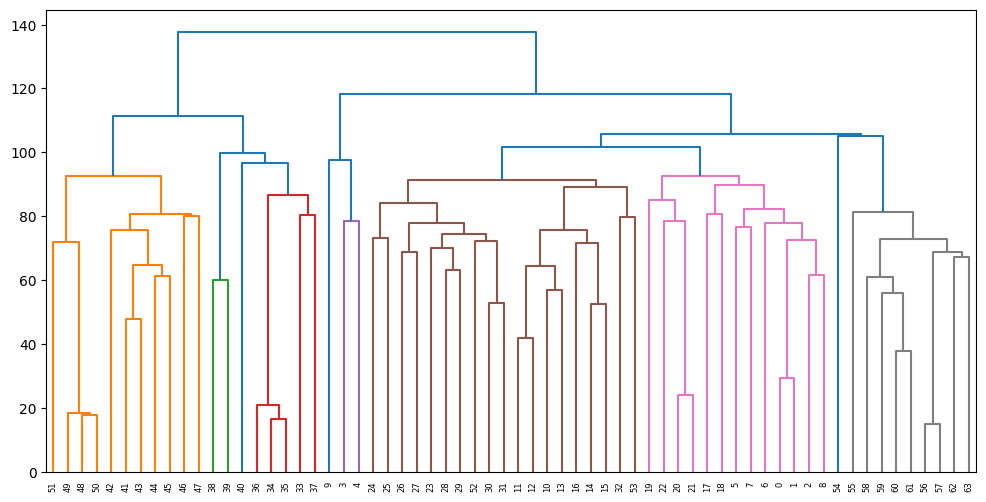

In [31]:
plt.figure(figsize=(12,6))
dendrogram(mergings)
plt.show()

In [32]:
labels = fcluster(mergings, 85, criterion='distance')

In [33]:
labels

array([15, 15, 15,  7,  7, 15, 15, 15, 15,  8, 10, 10, 10, 10, 10, 10, 10,
       14, 14, 13, 12, 12, 12,  9,  9,  9,  9,  9,  9,  9,  9,  9, 11,  5,
        4,  4,  4,  5,  3,  3,  6,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,
        1,  9, 11, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16], dtype=int32)

In [34]:
data2['hc_clusters']=labels

In [35]:
data2

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,15
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,15
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,15
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,7
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,16
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,16
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,16
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,16


In [36]:
new_data['hc_clusters'].value_counts()    # without pca

17    12
10     9
16     7
2      7
14     5
1      4
4      3
13     2
11     2
5      2
3      2
7      2
9      2
15     2
12     1
8      1
6      1
Name: hc_clusters, dtype: int64

In [37]:
data2['hc_clusters'].value_counts()  ## with pca

9     10
16     9
2      7
15     7
10     7
1      4
12     3
4      3
14     2
7      2
5      2
3      2
11     2
13     1
6      1
8      1
17     1
Name: hc_clusters, dtype: int64